<a href="https://colab.research.google.com/github/DAG00DAG33/ML-Languages/blob/master/otros/BaseDeDatos_Faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Programa para hacer base de datos de faces a partir de una ya existente: Labeled Faces in the Wild Home. Recorto las fotos para que solo sea la cara y tengan un tamano de 64x64

In [ ]:
import tensorflow as tf

import os
import time
import matplotlib.pyplot as plt
%matplotlib inline     
import matplotlib as mpl
import numpy as np
!pip install face_recognition
import face_recognition
from PIL import Image
import cv2

In [ ]:
_URL = 'http://vis-www.cs.umass.edu/lfw/lfw.tgz'

path_to_zip = tf.keras.utils.get_file('lfw.tgz',
                                      origin=_URL,
                                      extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'lfw/')

180568064/180566744 [==============================] - 8s 0us/step


In [ ]:
imgurlsNames = !ls -1 {PATH}
imgurls = []
for i in range(np.asarray(imgurlsNames).shape[0]):    
  imgurls.append(imgurlsNames[i] + "/" + imgurlsNames[i] +"_0001.jpg")

In [ ]:
# !rm -r {PATH + imgurlsNames[332]}
# !rm -r {PATH + imgurlsNames[415]}
# !rm -r {PATH + imgurlsNames[435]}
# !rm -r {PATH + imgurlsNames[415]}

In [ ]:
# PATH + imgurlsNames[332]

'/root/.keras/datasets/lfw/Ann_Landers'

Barbara_Bach


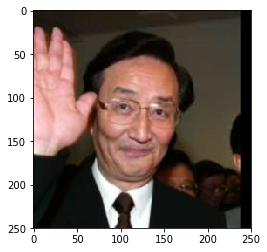

In [ ]:
image = mpl.image.imread(PATH + imgurls[903])
plt.imshow(image)
print(imgurlsNames[435])

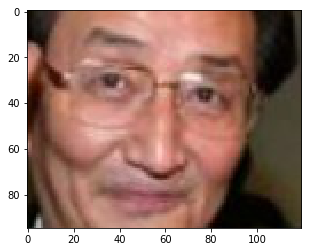

In [ ]:
i = 903
image = face_recognition.load_image_file(PATH + imgurls[i])
face_locations = face_recognition.face_locations(image)
face_landmarks_list = face_recognition.face_landmarks(image)
plt.imshow(image[face_locations[0][0]:face_locations[0][1], face_locations[0][3]:face_locations[0][2]]) #recortar imagen

In [ ]:
face_locations[0]

(8, 235, 116, 127)

In [ ]:
face_landmarks_list[0]['chin'][8]

(190, 128)

In [ ]:

for a in face_landmarks_list[0]['chin']:
  image[a[1], a[0]] = [0,255,0]
  
image[189,129] = [255,0,0]

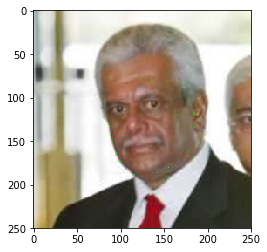

In [ ]:
plt.imshow(image)

In [ ]:
def get_points(path):
  image = face_recognition.load_image_file(path)
  face_landmarks_list = face_recognition.face_landmarks(image)
  face_points = np.zeros((3, 2))
  face_points[0] = face_landmarks_list[0]["left_eye"][0]
  face_points[1] = face_landmarks_list[0]["right_eye"][3]
  face_points[2] = face_landmarks_list[0]['chin'][8] #3
  return face_points

In [ ]:
def rectangle(points):
  middle_point = ((points[0] + points[1])/2).astype(int)
  width = (middle_point[0] - points[0][0] )*1.8
  x_min = middle_point[0] - width
  x_max = middle_point[0] + width
  y_min = points[2][1]
  y_max = y_min - (y_min - middle_point[1])*1.8
  
  return np.asarray(((x_min,y_max),(x_max,y_max), (x_max,y_min), (x_min,y_min), (x_max-x_min, y_min-y_max))).astype(int)
  

In [ ]:
def sqare(rectangle):
  middle_point = (rectangle[0] + rectangle[1] + rectangle[2] + rectangle[3])/4
  width = rectangle[4][0]
  height = rectangle[4][1]
  side = (width+height)/2
  side2 = side/2
  return np.asarray((middle_point+[-side2,-side2],middle_point+[side2,-side2],middle_point+[side2,side2],middle_point+[-side2,side2], (side,side))).astype(int)

[ 96. 111.]
[152. 119.]
[115. 190.]
[73 55]
[174  55]
[174 190]
[ 73 190]
[100 135]
[64 63]
[182  63]
[182 181]
[ 64 181]
[117 117]


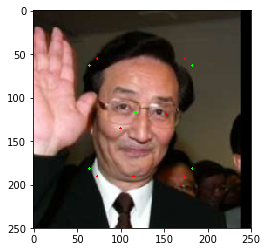

In [ ]:
i=903

image = np.array(Image.open(PATH + imgurls[i]))

for a in get_points(PATH + imgurls[i]):
  image[int(a[1]), int(a[0])] = [255,0,0]
  image[int(a[1]+1), int(a[0])] = [255,0,0]
  image[int(a[1]-1), int(a[0])] = [255,0,0]
  image[int(a[1]), int(a[0])+1] = [255,0,0]
  image[int(a[1]), int(a[0])-1] = [255,0,0]
  print(a)
  


for a in rectangle(get_points(PATH + imgurls[i])):
  image[int(a[1]), int(a[0])] = [255,0,0]
  image[int(a[1]+1), int(a[0])] = [255,0,0]
  image[int(a[1]-1), int(a[0])] = [255,0,0]
  image[int(a[1]), int(a[0])+1] = [255,0,0]
  image[int(a[1]), int(a[0])-1] = [255,0,0]
  print(a)
  
for a in sqare(rectangle(get_points(PATH + imgurls[i]))):
  image[int(a[1]), int(a[0])] = [0,255,0]
  image[int(a[1]+1), int(a[0])] = [0,255,0]
  image[int(a[1]-1), int(a[0])] = [0,255,0]
  image[int(a[1]), int(a[0])+1] = [0,255,0]
  image[int(a[1]), int(a[0])-1] = [0,255,0]
  print(a)
sq = sqare(rectangle(get_points(PATH + imgurls[i])))
sq_image = image[sq[0,1]:sq[2,1],sq[0,0]:sq[2,0]]
rs_image = cv2.resize(sq_image, (64,64))
plt.imshow(image)

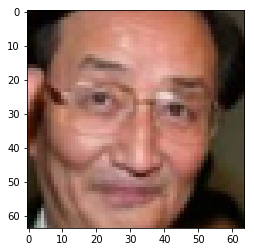

In [ ]:
i=903

image = np.array(Image.open(PATH + imgurls[i]))

sq = sqare(rectangle(get_points(PATH + imgurls[i])))
sq_image = image[sq[0,1]:sq[2,1],sq[0,0]:sq[2,0]]
rs_image = cv2.resize(sq_image, (64,64))
plt.imshow(rs_image)

In [ ]:
X = []
Names = []
lados= []
j = 0
for i, name in zip(imgurls, imgurlsNames):
  if j%1000==0:
    print(j)
  j+=1
  image = np.array(Image.open(PATH + i))
  try:
    sq = sqare(rectangle(get_points(PATH + i)))
    sq_image = image[sq[0,1]:sq[2,1],sq[0,0]:sq[2,0]]
    lados.append(sq[2,1]-sq[0,1])
    rs_image = cv2.resize(sq_image, (64,64))
    X.append(rs_image)
    Names.append(name)
    # plt.imshow(rs_image)
    
  except IndexError:
    print("Oops!  That was no valid number.  Try again...")
  except:
    print("Oops! EEEEEEERRRRRRRROOOOOOORRRRR")

  
X = np.asarray(X)
X.shape
Names = np.asarray(Names)

0
Oops!  That was no valid number.  Try again...
Oops! EEEEEEERRRRRRRROOOOOOORRRRR
Oops! EEEEEEERRRRRRRROOOOOOORRRRR
Oops!  That was no valid number.  Try again...
Oops!  That was no valid number.  Try again...
Oops!  That was no valid number.  Try again...
Oops! EEEEEEERRRRRRRROOOOOOORRRRR
1000
Oops!  That was no valid number.  Try again...
Oops!  That was no valid number.  Try again...
Oops! EEEEEEERRRRRRRROOOOOOORRRRR
Oops!  That was no valid number.  Try again...
Oops!  That was no valid number.  Try again...
Oops! EEEEEEERRRRRRRROOOOOOORRRRR
Oops!  That was no valid number.  Try again...
Oops!  That was no valid number.  Try again...
Oops!  That was no valid number.  Try again...
Oops! EEEEEEERRRRRRRROOOOOOORRRRR
Oops!  That was no valid number.  Try again...
2000
Oops!  That was no valid number.  Try again...
Oops!  That was no valid number.  Try again...
Oops! EEEEEEERRRRRRRROOOOOOORRRRR
Oops!  That was no valid number.  Try again...
Oops!  That was no valid number.  Try again..

'Slobodan_Milosevic'

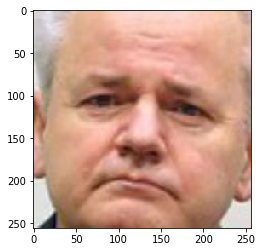

In [ ]:
plt.imshow(X[5004])
Names[5004]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
PATH2 = '/content/drive/My Drive/Faces/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import h5py
with h5py.File(PATH2 + 'facesDatabase.h5', 'w') as hf:
    hf.create_dataset("X",  data=X)
#     hf.create_dataset("Names",  data=Names)


In [ ]:
import pickle
with open(PATH2 + "Names.txt", "wb") as fp:
  pickle.dump(Names, fp)


In [ ]:
with open(PATH2 + "Names.txt", "rb") as fp:
  b = pickle.load(fp)

In [ ]:
b[100]

'Alberta_Lee'

In [ ]:
a=0
for lado in lados:
  a+=lado
print(a/len(lados))

119.66258527199581
